# Notebook to explore the fitness data



In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pathlib import Path
from os import path

home = Path(path.abspath('..'))
data = home / 'book_data'



## Read the Data

The data is kept in an excel file called *Fitness.csv*, in a sheet named "Data."

Need to fill the Nan/Blank columns with 0.

In [15]:
values = {"Str_Trng":0, "Func_Trng":0, "Yoga":0, "Run":0, "Walk":0, "Hike":0, "Bike":0,"Other": 0}
raw_df = pd.read_excel(data / 'Fitness.xlsx' ,sheet_name='Data').fillna(value=values)


In [18]:
raw_df

,Date,Weight,BF,Activity,Str_Trng,Func_Trng,Yoga,Run,Walk,Hike,Bike,Other,Steps,Miles,Flights
0,2024-08-16,185.6,NaN,1130.0,472.0,0.0,0.0,0.0,234.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2024-08-17,186.3,NaN,1946.0,495.0,0.0,0.0,0.0,0.0,0.0,261.0,0.0,NaN,NaN,NaN
2,2024-08-18,184.5,NaN,1693.0,0.0,0.0,0.0,0.0,0.0,0.0,1273.0,0.0,NaN,NaN,NaN
3,2024-08-19,185.1,NaN,1081.0,445.0,0.0,0.0,0.0,264.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2024-08-20,184.6,NaN,1113.0,466.0,0.0,0.0,0.0,187.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2024-11-26,177.7,24.6,1049.0,429.0,0.0,0.0,0.0,290.0,0.0,0.0,0.0,15820.0,6.63,9.0
79,2024-11-27,178.4,24.6,1097.0,0.0,0.0,454.0,0.0,65.0,0.0,0.0,0.0,12467.0,5.08,21.0
80,2024-11-28,178.7,24.6,1211.0,424.0,0.0,0.0,0.0,0.0,193.0,0.0,0.0,16809.0,7.15,15.0
81,2024-11-29,177.6,24.5,1229.0,500.0,0.0,0.0,0.0,0.0,262.0,0.0,0.0,18166.0,7.62,19.0


## Calculations

The data is simply as recorded from the data sources. There are a few calculations to make.

The first is to calculate the active calories from the named activities.These activities record data when in the fitness mode.  This Series contains the "residual" value of activity (kCal) not associated with any activity.


In [20]:
raw_df['Step_Act'] = raw_df.apply(lambda row: (row['Activity']-(row['Str_Trng']+
                                                row['Func_Trng']+
                                                row['Yoga']+
                                                row['Run']+
                                                row['Walk']+
                                                row['Hike']+
                                                row['Bike']+
                                                row['Other'])
                                                ), axis=1)

steps_df=raw_df.loc[:,['Step_Act','Steps']].dropna()
steps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 34 to 81
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Step_Act  46 non-null     float64
 1   Steps     46 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


## Investigate Steps

Given that we now have the "excess" actvity associateded with steps, lets see if there is strong corelation using linear regression.

Score:  0.1257294350288175
Coefficients: [0.01564574]
Intercept: 238.70238925807848


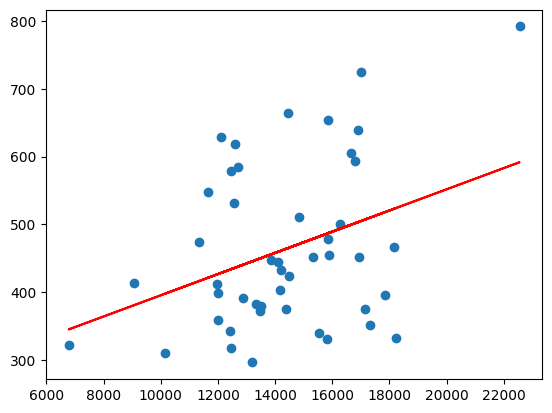

In [21]:
X = steps_df['Steps'].to_numpy().reshape(-1,1)
y = steps_df['Step_Act'].to_numpy()

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print the coefficients
print("Score: ", model.score(X,y))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Plot the data and the regression line
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()
